# Importing Necessary Modules

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
data = pd.read_csv('Social_Network_Ads (1).csv')

In [100]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Data Visulaizing

In [101]:
data.drop(['User ID', 'Gender'], axis=1, inplace=True)

In [102]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [86]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [87]:
data.shape

(400, 3)

<Axes: >

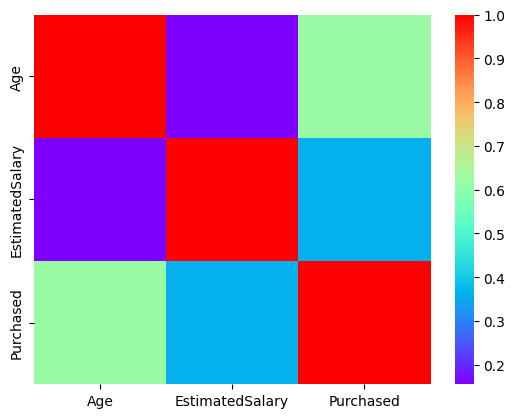

In [88]:
sns.heatmap(data.corr(), cmap='rainbow')

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

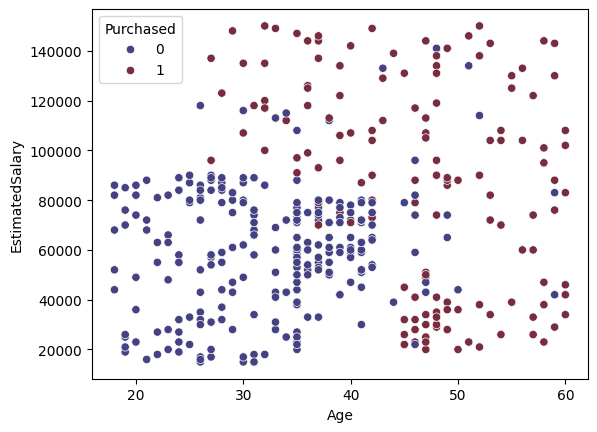

In [89]:
sns.scatterplot(x=data['Age'], y=data['EstimatedSalary'], hue=data['Purchased'], palette='icefire')

# Splitting Data

In [90]:
X = data.iloc[:, 0:2]
y = data.iloc[:, -1]

In [91]:
# Splitting data into Train and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Data Preprocessing

In [92]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the model

### 1) Training the SVC with linear kernel

In [93]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', random_state=0)

# fitting our model
svc.fit(X_train, y_train)

# Predicting the model performance
y_pred = svc.predict(X_test)

### 2) Training the SVC with Polynomial Kernel

In [94]:
from sklearn.svm import SVC

svc_poly = SVC(kernel='poly', degree=3)

# fitting our model
svc_poly.fit(X_train, y_train)

# Predicting the model performance
y_pred = svc_poly.predict(X_test)

# Model Evaluation

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix

### For Linear Kernel

In [96]:
print(f"The accuracy of the model is: {accuracy_score(y_test, y_pred)}")

print(f"confusion matrix: {confusion_matrix(y_test, y_pred)}")

The accuracy of the model is: 0.8
confusion matrix: [[44  2]
 [14 20]]


### For Polynomial Kernel

In [97]:
print(f"The accuracy of the model is: {accuracy_score(y_test, y_pred)}")

print(f"confusion matrix: {confusion_matrix(y_test, y_pred)}")

The accuracy of the model is: 0.8
confusion matrix: [[44  2]
 [14 20]]


# With KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [107]:
knn.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [110]:
accuracy_score(y_test, knn.predict(X_test))

0.9

In [111]:
confusion_matrix(y_test, knn.predict(X_test))

array([[43,  3],
       [ 5, 29]], dtype=int64)

In [112]:
accuracy = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test, knn.predict(X_test)))

In [114]:
max(accuracy)

0.9375

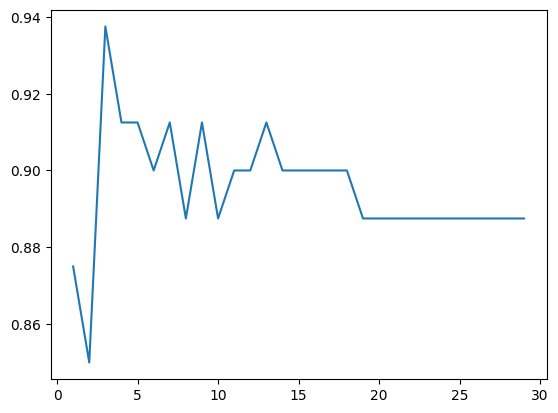

In [115]:
plt.plot(range(1,30), accuracy)